In [ ]:
import os
os.chdir("c\\users\\Mangar\\Desktop")

In [74]:
# 1. Import Libraries
import pandas as pd        # to load and manipilate data

In [77]:
# 2. Load the dataset (by ensuring CSV file is in the same folder)
salary = pd.read_csv("income_expense_data.csv")

In [76]:
#checking size of data
salary.shape

(14, 3)

In [75]:
# Display the first few rows
salary.head(10)

,Age,Income,Expense
0,25,40000.0,20000
1,26,35000.0,18000
2,27,90000.0,60000
3,32,70000.0,28000
4,31,75000.0,32000
5,30,71000.0,30000
6,47,NaN,25000
7,125,76000.0,30000
8,49,56000.0,16000
9,55,67000.0,20000


In [ ]:
#treating null value-replacing null value with median
salary["Income"].fillna((salary["Income"].median()), inplace = True)

In [21]:
salary.isnull().sum()

Age        0
Income     0
Expense    0
dtype: int64

In [22]:
salary.describe()

,Age,Income,Expense
count,14.000000,14.000000,14.000000
mean,48.500000,65357.142857,25285.714286
std,25.928155,17032.128657,11795.883059
min,25.000000,35000.000000,11000.000000
25%,30.250000,56000.000000,18500.000000
50%,48.000000,70000.000000,24500.000000
75%,55.750000,75750.000000,29500.000000
max,125.000000,90000.000000,60000.000000


In [24]:
pd.DataFrame(salary['Age']).describe(percentiles=(1,0.99,0.9,0.75,0.5,0.3,0.1,0.01))

,Age
count,14.000000
mean,48.500000
std,25.928155
min,25.000000
1%,25.130000
10%,26.300000
30%,30.900000
50%,48.000000
75%,55.750000
90%,61.400000


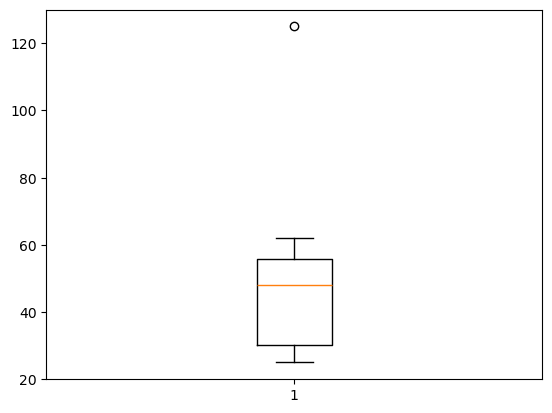

In [26]:
#checking boxplot for Age coloumn
import matplotlib.pyplot as plt
%matplotlib inline

plt.boxplot(salary['Age'])
plt.show()

In [ ]:
#checking outlier by definition and treating outliers
#getting median Age
Age_col_df = pd.DataFrame(salary['Age'])
#getting IQR of Age Coloumn
Q3 = Age_col_df.quantile(q=0.75).iloc[0]
Q1 = Age_col_df.quantile(q=0.25).iloc[0]
IQR = Q3 - Q1


# Deriving boundaries of outliers
IQL_LL = Q1 - 1.5 * IQR
IQR_UL = Q3 + 1.5 * IQR

#finding and treating outliers - both lower and upper end
salary.loc[salary['Age'] > IQR_UL, 'Age'] = Age_col_df.quantile(q=0.99).iloc[0]
salary.loc[salary['Age'] < IQL_LL, 'Age'] = Age_col_df.quantile(q=0.01).iloc[0]

In [32]:
#check max age value now
max(salary['Age'])

102.01999999999997

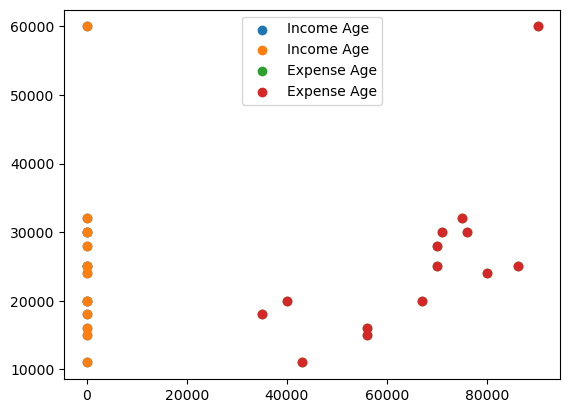

In [39]:
##############################3-Exploratory data analysis################################
#check how expense is varying with income
x= salary["Income"]
y= salary["Expense"]
plt.scatter(x,y, label="Expense Age")
plt.legend()
plt.show()

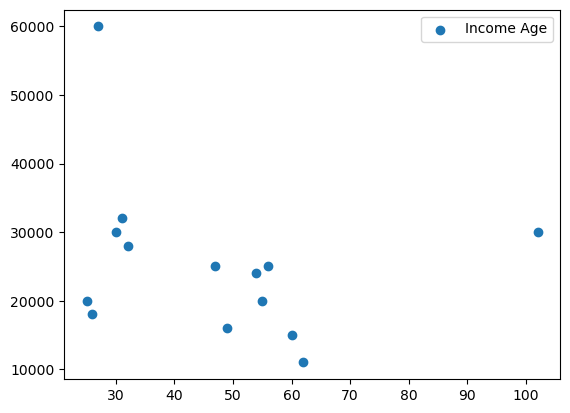

In [40]:
#check how expense is varying with Age
x = salary["Age"]
y= salary["Expense"]

plt.scatter(x,y, label="Income Age")
plt.legend()
plt.show()

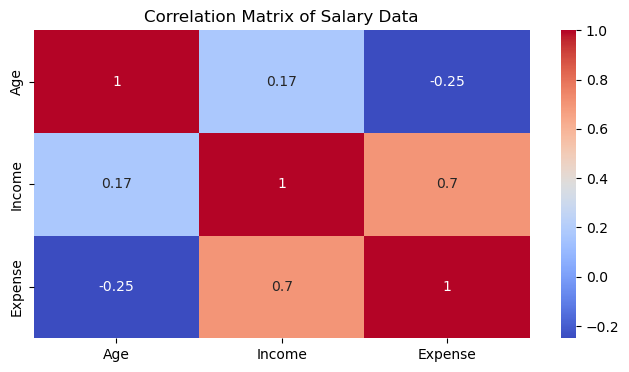

In [45]:
#check correltion matrix - to check the strength of the variation between two variables
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = salary.corr().round(2)

f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(data=correlation_matrix, annot=True, cmap="coolwarm", ax=ax)

plt.title("Correlation Matrix of Salary Data")
plt.show()

what is feature engineering?

#its playing around with features to acheive below goals.
#preparing the propar input dataset, compatible with the machine learning algorthm requirements.
#improving the performance of machine learning models.

In [48]:
############################step 4-feature engineering#############################
#Normalization/scaling of data - understanding scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(salary)
scaled_data

array([[0.        , 0.09090909, 0.18367347],
       [0.01298364, 0.        , 0.14285714],
       [0.02596728, 1.        , 1.        ],
       [0.09088548, 0.63636364, 0.34693878],
       [0.07790184, 0.72727273, 0.42857143],
       [0.0649182 , 0.65454545, 0.3877551 ],
       [0.28564009, 0.63636364, 0.28571429],
       [1.        , 0.74545455, 0.3877551 ],
       [0.31160737, 0.38181818, 0.10204082],
       [0.38950922, 0.58181818, 0.18367347],
       [0.37652558, 0.81818182, 0.26530612],
       [0.40249286, 0.92727273, 0.28571429],
       [0.45442742, 0.38181818, 0.08163265],
       [0.4803947 , 0.14545455, 0.        ]])

In [53]:
#converting data back to DataFram
salary_scaled = pd.DataFrame(scaled_data)
salary_scaled.columns = ["Age", "Income", "Expense"]


In [56]:
#separate features and response
features = ["Income", "Age"]
Response = ["Expense"]

x = salary_scaled[features]
y = salary_scaled[Response]

In [61]:
y

,Expense
0,0.183673
1,0.142857
2,1.000000
3,0.346939
4,0.428571
5,0.387755
6,0.285714
7,0.387755
8,0.102041
9,0.183673


In [62]:
#Dividing data in test and train
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#importing neccessary packages
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [63]:
#fitting linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [66]:
#checking accuracy on test data
accuracy = model.score(x_test, y_test)
print(accuracy*100,'%')

68.29887188002432 %


In [67]:
#the test data - predictors
x_test 

,Income,Age
8,0.381818,0.311607
6,0.636364,0.285640
4,0.727273,0.077902


In [68]:
#the actual values in test data - target column
y_test

,Expense
8,0.102041
6,0.285714
4,0.428571


In [69]:
#predicted values on test data
model.predict(x_test)

array([[0.1958992 ],
       [0.35713472],
       [0.48405093]])

In [70]:
#checking the intercept of model equation
model.intercept_
y=mx+c
y=n1*1+m2*2+c

array([0.07651102])

In [71]:
#checking the coefficients of the model equation
model.coef_

array([[ 0.59778726, -0.34934304]])

In [ ]:
#creating the model equation - manually
Expense = (0.59778726*Income - 0.34934304*Age) + 0.07651102
#substituting one value and matching result - manually
Expense = (0.597787726*0.381818 - 0.34934304* 0.311607) + 0.07651102 = 0.1958993973

substituting original value and matching result - manually
Expense = ((0.597787726*0381818 - 0.34934304* 0.311607) + 0.07651102 = 15000 approx
